In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_venn as venn
import seaborn as sns

In [41]:
df = pd.read_csv('Bar_metre_d_Opini__Pol_tica__BOP_._1a_onada_2024.csv')

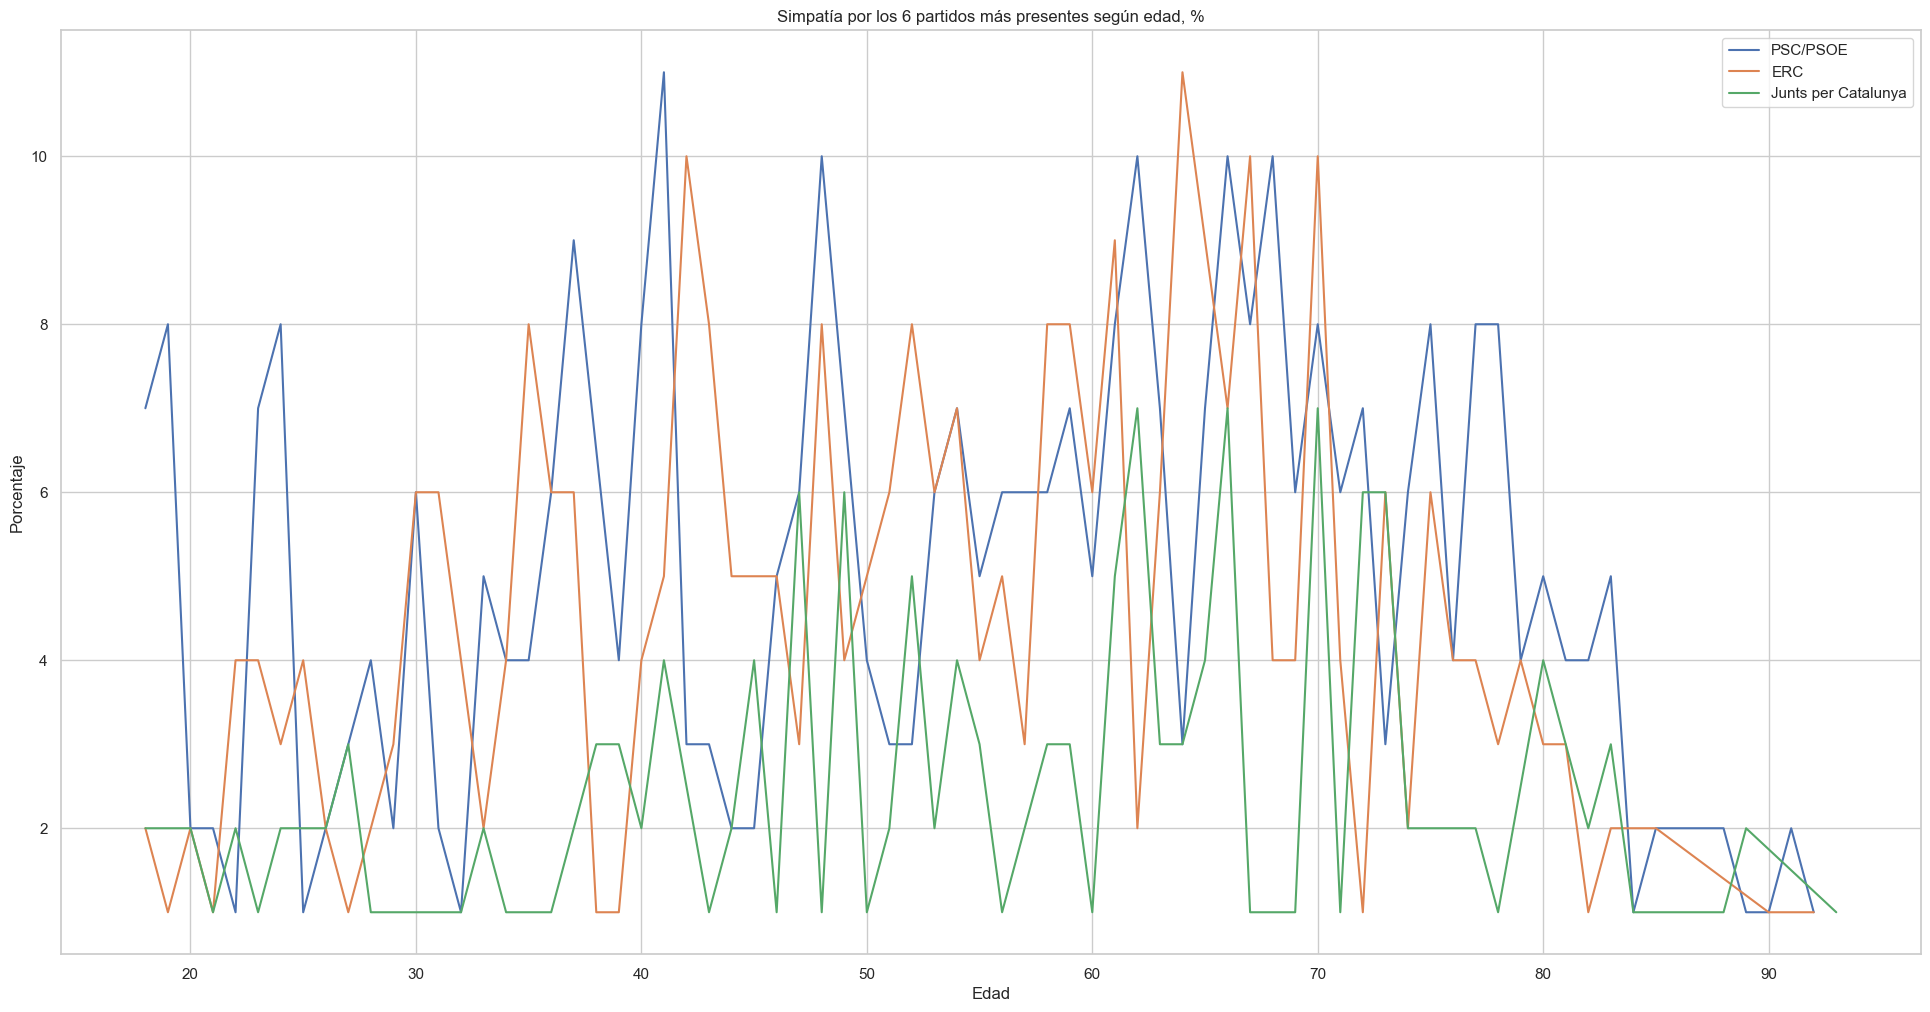

In [43]:
columnas_seleccionadas = [
    "EDAT", 
    "SIMPATIA_PARTIT_R", 
    # "INT_PARLAMENT_VOT_R", 
    # "REC_PARLAMENT_VOT_R",
    # "REC_PARLAMENT_VOT_CENS_R", 
    # "INT_CONGRES_VOT_R", 
    # "REC_CONGRES_VOT_R", 
    # "REC_CONGRES_VOT_CENS_R"
]
columnas_renombradas = {
    "EDAT": "Edad",
    "SIMPATIA_PARTIT_R": "Simpatía por Partido",
    "INT_PARLAMENT_VOT_R": "Intención Voto Parlamento",
    "REC_PARLAMENT_VOT_R": "Recuerdo Voto Parlamento",
    "REC_PARLAMENT_VOT_CENS_R": "Recuerdo Voto Parlamento (Censo)",
    "INT_CONGRES_VOT_R": "Intención Voto Congreso",
    "REC_CONGRES_VOT_R": "Recuerdo Voto Congreso",
    "REC_CONGRES_VOT_CENS_R": "Recuerdo Voto Congreso (Censo)"
}


top_partidos = df[df["SIMPATIA_PARTIT_R"] != 'Cap']["SIMPATIA_PARTIT_R"].value_counts().head(3).index

# Agrupamos por edad y simpatía, y contamos solo para los 4 valores más presentes
grouped = df[df["SIMPATIA_PARTIT_R"].isin(top_partidos)].groupby(["EDAT", "SIMPATIA_PARTIT_R"]).size().reset_index(name="count")

# Normalizamos los datos
total_counts = grouped.groupby("EDAT")["count"].transform("sum")
grouped["normalized_count"] = grouped["count"] 

# Creamos el gráfico de barras normalizado
plt.figure(figsize=(24, 12))
for partido in top_partidos:
    partido_data = grouped[grouped["SIMPATIA_PARTIT_R"] == partido]
    plt.plot(partido_data["EDAT"], partido_data["normalized_count"], label=partido)
plt.xlabel("Edad")
plt.ylabel("Porcentaje")
plt.title("Simpatía por los 6 partidos más presentes según edad, %")
plt.legend()
plt.show()

401


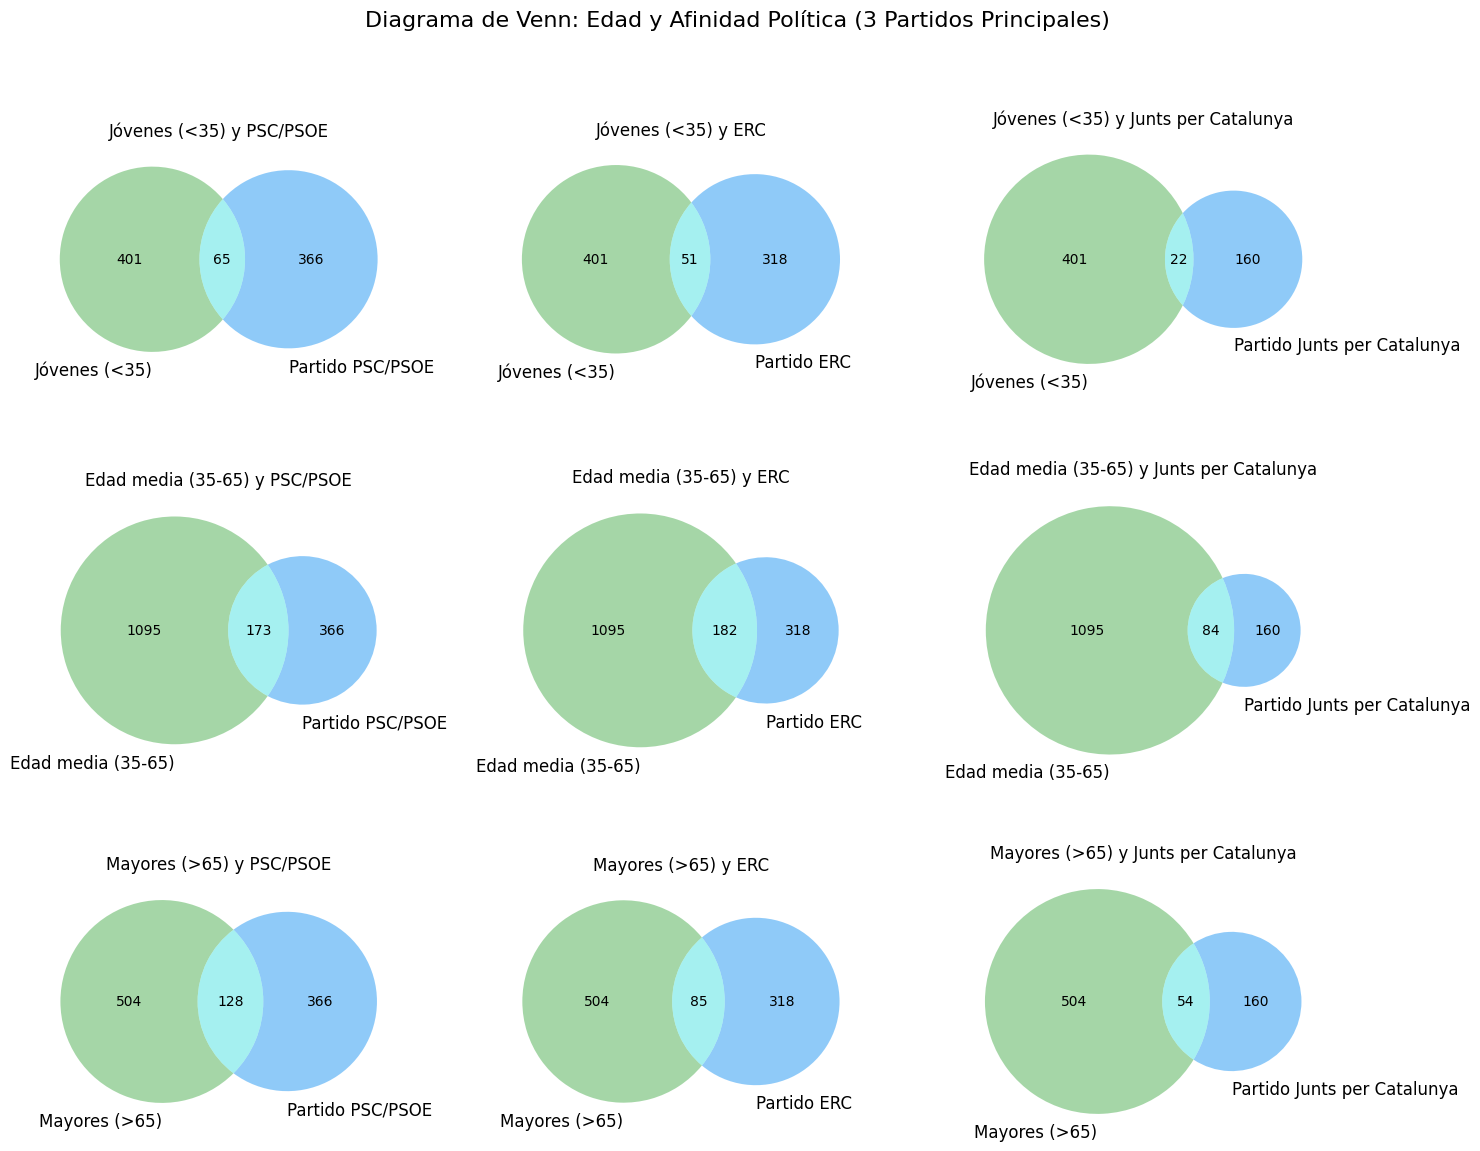

In [14]:
# Definir los límites de edad
young_age = 35
middle_age = 65

# Seleccionar los tres partidos con mayor incidencia en SIMPATIA_PARTIT_R (excluyendo 'Cap')
top_parties = df[df["SIMPATIA_PARTIT_R"] != 'Cap']["SIMPATIA_PARTIT_R"].value_counts().nlargest(3).index

# Crear conjuntos para cada grupo de edad - Estos conjuntos serán fijos para todos los partidos
young = set(df[df["EDAT"] < young_age].index)
middle = set(df[(df["EDAT"] >= young_age) & (df["EDAT"] <= middle_age)].index)
senior = set(df[df["EDAT"] > middle_age].index)
print(len(young))

# Crear un diccionario con índices de los simpatizantes de cada partido
party_supporters = {}
for partido in top_parties:
    party_supporters[partido] = set(df[df["SIMPATIA_PARTIT_R"] == partido].index)

# Configurar el gráfico: 3 filas (una por grupo de edad) y 3 columnas (una por cada partido)
fig, ax = plt.subplots(3, len(top_parties), figsize=(15, 12))
fig.suptitle("Diagrama de Venn: Edad y Afinidad Política (3 Partidos Principales)", fontsize=16)

# Crear diagramas de Venn para cada grupo de edad y partido
age_groups = {
    "Jóvenes (<35)": young,
    "Edad media (35-65)": middle,
    "Mayores (>65)": senior
}

for row_idx, (age_group_label, age_group_set) in enumerate(age_groups.items()):
    for col_idx, (partido, supporters) in enumerate(party_supporters.items()):
        # Calcular las intersecciones para el diagrama de Venn
        only_age_group = len(age_group_set)
        only_supporters = len(supporters)
        age_and_supporters = len(age_group_set & supporters)

        venn.venn2(
            subsets=(only_age_group, only_supporters, age_and_supporters),
            set_labels=(age_group_label, f"Partido {partido}"),
            set_colors=("#4CAF50", "#2196F3"),
            alpha=0.5,
            ax=ax[row_idx, col_idx]
        )
        ax[row_idx, col_idx].set_title(f"{age_group_label} y {partido}")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para que el título principal no se solape
plt.show()


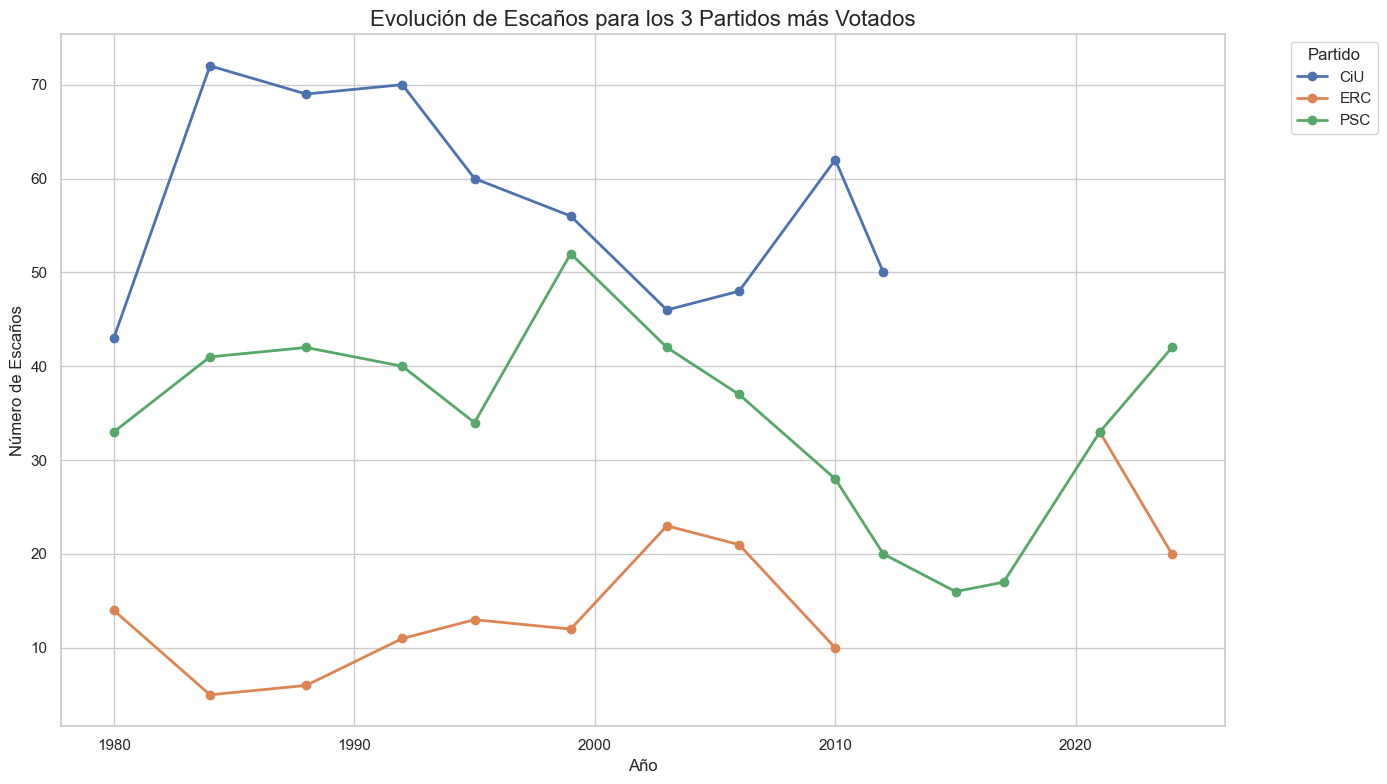

In [33]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv("resultados_electorales.csv")

# Obtener los 3 partidos más votados en total
top_parties = df.groupby("Partido")["Escaños"].sum().sort_values(ascending=False).head(3).index

# Filtrar el DataFrame para incluir solo los 3 partidos más votados
df_top_parties = df[df["Partido"].isin(top_parties)]

# Pivotear los datos para tener los años como columnas y cada partido en las filas con sus escaños en cada año
df_pivot = df_top_parties.pivot(index="Partido", columns="Año", values="Escaños")

# Configurar el estilo del gráfico
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Crear el Bump Chart con el número de escaños para los 3 partidos más votados
for partido in df_pivot.index:
    plt.plot(df_pivot.columns, df_pivot.loc[partido], marker='o', label=partido, linewidth=2)

# Etiquetas y título
plt.title("Evolución de Escaños para los 3 Partidos más Votados", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de Escaños", fontsize=12)

# Mostrar leyenda
plt.legend(title="Partido", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.tight_layout()
plt.show()

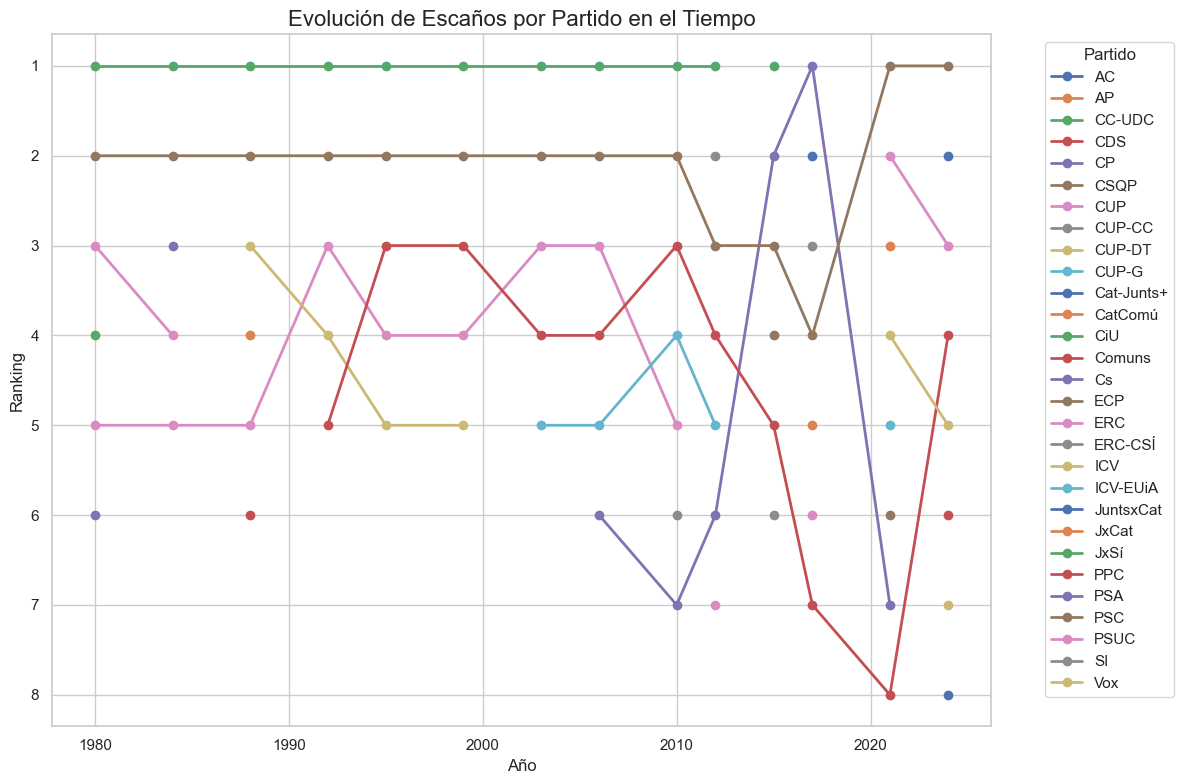

In [39]:

# Cargar los datos desde el archivo CSV
df = pd.read_csv("resultados_electorales.csv")

# Ordenar los datos por año y luego por el número de escaños en orden descendente
df = df.sort_values(["Año", "Escaños"], ascending=[True, False])

# Añadir una columna de ranking para cada año
df['Ranking'] = df.groupby('Año')['Escaños'].rank("first", ascending=False)

# Pivoteo de datos para que los años sean columnas, y el índice sea el partido con sus rankings en cada año
df_pivot = df.pivot(index="Partido", columns="Año", values="Ranking")

# Configurar el estilo del gráfico
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Crear el Bump Chart
for partido in df_pivot.index:
    plt.plot(df_pivot.columns, df_pivot.loc[partido], marker='o', label=partido, linewidth=2)

# Etiquetas y título
plt.gca().invert_yaxis()  # Invertir el eje Y para que el ranking 1 esté arriba
plt.title("Evolución de Escaños por Partido en el Tiempo", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Ranking", fontsize=12)

# Mostrar leyenda
plt.legend(title="Partido", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.tight_layout()
plt.show()